In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("./ranking.csv")

In [5]:
df.columns

Index(['Academic.Reputation.Score', 'Citations.per.Faculty.Score',
       'Employer.Reputation.Score', 'Employment.Outcomes.Score',
       'Faculty.Student.Score', 'International.Faculty.Score',
       'International.Research.Network.Score', 'International.Students.Score',
       'Sustainability.Score'],
      dtype='object')

In [6]:
df

,Academic.Reputation.Score,Citations.per.Faculty.Score,Employer.Reputation.Score,Employment.Outcomes.Score,Faculty.Student.Score,International.Faculty.Score,International.Research.Network.Score,International.Students.Score,Sustainability.Score
1,100.0,100.0,100.0,100.0,100.0,100.0,94.3,88.2,95.2
2,100.0,92.3,100.0,100.0,100.0,100.0,99.9,95.8,97.3
3,100.0,90.6,100.0,100.0,100.0,98.2,100.0,98.2,97.8
4,100.0,100.0,100.0,100.0,98.3,84.6,100.0,66.8,96.7
5,100.0,99.9,100.0,100.0,100.0,99.9,95.8,51.2,94.4
...,...,...,...,...,...,...,...,...,...
1483,6.9,1.4,3.9,6.1,4.9,2.1,1.0,1.1,1.1
1485,5.3,1.1,2.4,7.1,7.8,6.5,1.0,1.1,1.4
1489,4.0,3.6,2.4,9.2,10.3,1.0,2.7,1.1,1.0
1493,5.0,1.7,2.0,5.9,3.6,1.6,1.8,7.0,2.2


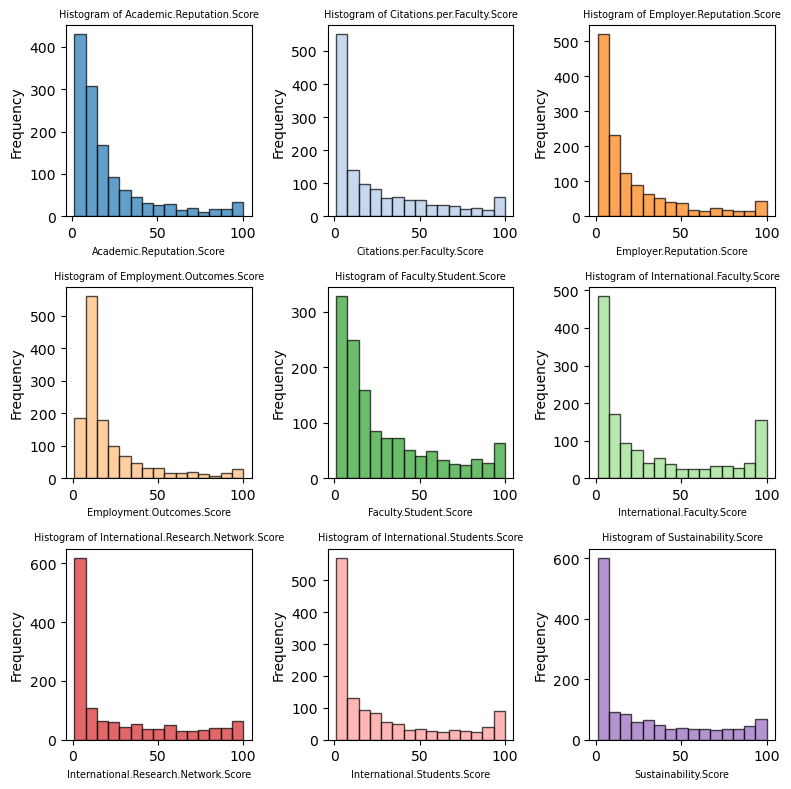

In [7]:
# Number of histograms to display
num_histograms = 9

# Create a 4x4 grid of subplots to accommodate 16 histograms
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

# Flatten the axes array to iterate through subplots easily
axes_flat = axes.flatten()

# Get a list of (16) distinct colors from the tab20 colormap
colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, (column, ax) in enumerate(zip(df.columns, axes_flat)):
    df[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)
    
# Remove any extra empty subplots if the number of variables is less than 16
if i < num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('plots.png')

In [8]:
for column in df.columns:
    try:
        df[column] = np.log10(df[column])
    except (ValueError, AttributeError):
        pass

In [9]:
import seaborn as sns

In [10]:
corr = df.corr()

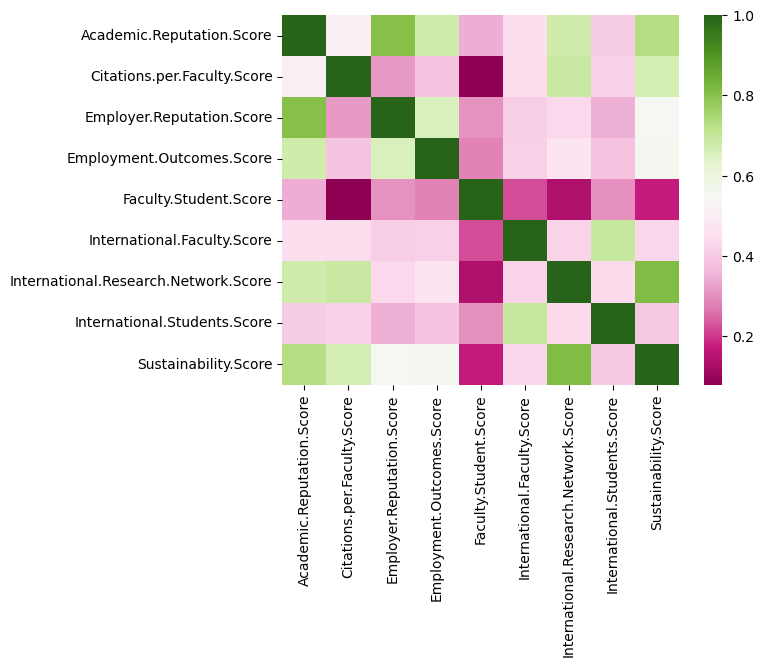

In [12]:
sns.heatmap(corr, cmap="PiYG")
plt.savefig("heatmap.png")